In [27]:
import numpy as np
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pprint

# Visualisation des données

In [28]:
df = pd.read_csv("csv/kc_house_data.csv")

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Aucune valeur manquante

In [30]:
df.head(6)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930


In [31]:
df[df.duplicated()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


Il n'y a pas de valeur dupliquer

Convertion de la date

In [32]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT000000')

In [33]:
# df['date'] = df["date"].dt.strftime('%Y-%m')


### Supression des ligne dont les maisons n'ont pas de salle de bain et de chambre et les maisons ou il y a 33 chambres 

In [34]:
mask = (df["bedrooms"] != 0) & (df["bedrooms"] != 33)
mask2 = df["bathrooms"] != 0 

In [35]:
df = df[mask & mask2]

# Distribution des variables catégorielles

<AxesSubplot:xlabel='bathrooms', ylabel='Count'>

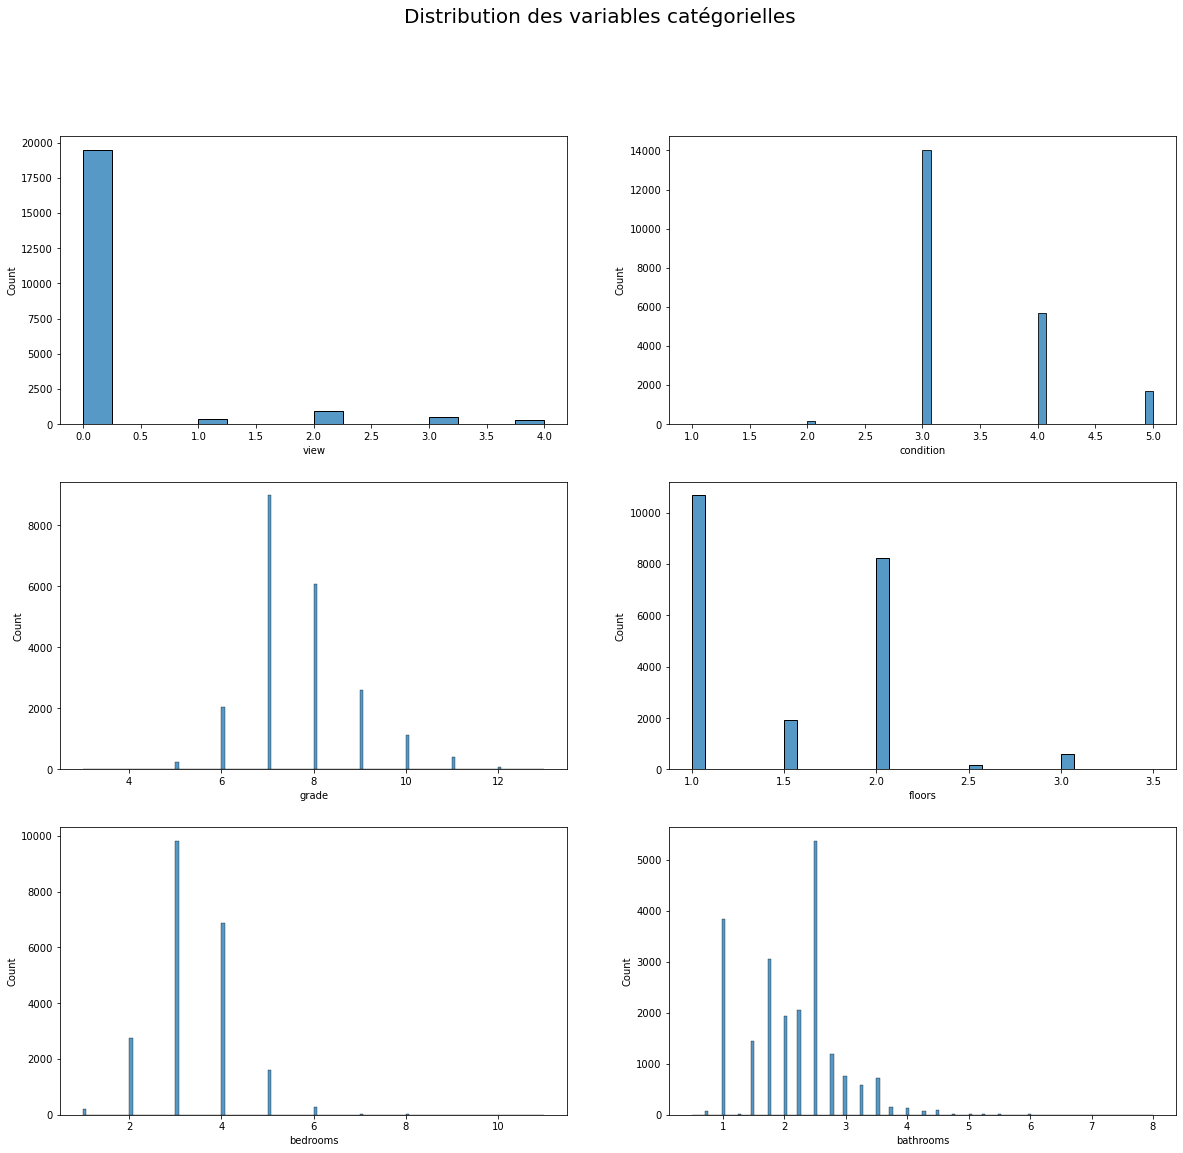

In [36]:
fig, ax = plt.subplots(3,2, figsize=(20, 18))
plt.suptitle('Distribution des variables catégorielles', fontsize=20)
sns.histplot(ax=ax[0,0],x='view',data=df)
sns.histplot(ax=ax[0,1],x='condition',data=df)
sns.histplot(ax=ax[1,0],x='grade',data=df)
sns.histplot(ax=ax[1,1],x='floors',data=df)
sns.histplot(ax=ax[2,0],x='bedrooms',data=df)
sns.histplot(ax=ax[2,1],x='bathrooms',data=df)

# Visualisation Carte

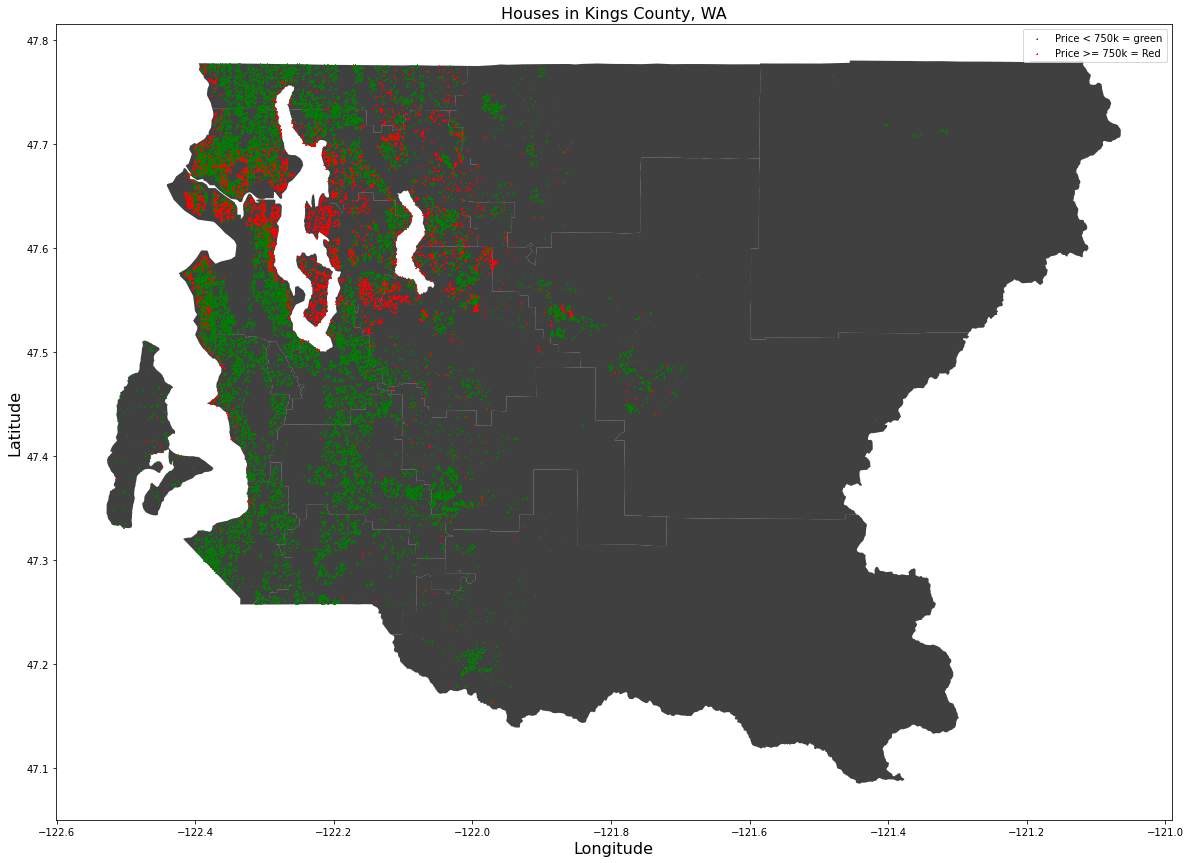

In [37]:

geometry = [Point(xy) for xy in zip(df["long"],df["lat"])]
geo_df = GeoDataFrame(df,geometry =geometry)
kings_county = gpd.read_file('School_Districts_in_King_County___schdst_area/School_Districts_in_King_County___schdst_area.shp')

fig, ax = plt.subplots(figsize = (20,20))
kings_county.plot(ax=ax, alpha = 0.75, color = 'black')

geo_df[geo_df['price'] < 750000].plot(ax = ax , markersize = 1, color = 'green',marker = '+',label = 'Price < 750k = green',aspect = 1.5)
geo_df[geo_df['price'] >= 750000].plot(ax = ax , markersize = 1,color = 'red',marker = '+',label = 'Price >= 750k = Red', aspect = 1.5)


plt.legend(prop = {'size':10} )
ax.set_title('Houses in Kings County, WA', fontdict = {'fontsize':
                16})
ax.set_ylabel('Latitude',fontdict = {'fontsize': 16})
ax.set_xlabel('Longitude',fontdict = {'fontsize': 16})


plt.show()

In [38]:

fig = px.scatter_mapbox(df,lat='lat',lon='long',center=dict(lat=df.lat.mean(), lon=df.long.mean()),color = df.price, zoom=7.5,
                        mapbox_style="carto-darkmatter",color_continuous_scale= [
                [0, "green"],
                [(750000)/df.price.max(), "green"],
                [(750001)/df.price.max(), "red"],
                [1, "red"]],
                        opacity = 1,size_max=1)
                        
fig.update_layout(title = 'Houses in Kings County, WA, 2014-2015', title_x=0.5)
fig.show()

# Corrélation

In [39]:
df[df.columns[1:]].corr()['price'][:].sort_values(ascending=False).to_frame()

,price
price,1.000000
sqft_living,0.701921
grade,0.667935
sqft_above,0.605395
sqft_living15,0.585273
bathrooms,0.525915
view,0.397323
sqft_basement,0.323772
bedrooms,0.315966
lat,0.306772


In [40]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'geometry'],
      dtype='object')

# One hot encoder

In [41]:
df["bedrooms"] = df["bedrooms"].astype(str)
df["zipcode"] = df["zipcode"].astype(str)
df["view"] = df["view"].astype(str)

df_dum = pd.get_dummies(df)

Revérification de la corrélation

In [42]:
df_dum[df_dum.columns[1:]].corr()['price'][:].sort_values(ascending=False).to_frame().head(20)

,price
price,1.000000
sqft_living,0.701921
grade,0.667935
sqft_above,0.605395
sqft_living15,0.585273
bathrooms,0.525915
sqft_basement,0.323772
view_4,0.308006
lat,0.306772
zipcode_98004,0.271192


# Colonnes qui sont gardés

Créeation d'une nouvelle colonne qui est la somme des 7 colonnes zipcode dont la corrélation est significative 

In [43]:
df_dum["quartier"]= df_dum["zipcode_98004"]  + df_dum["zipcode_98006"]+ df_dum["zipcode_98033"]+ df_dum["zipcode_98039"] + df_dum["zipcode_98040"]+ df_dum["zipcode_98105"] + df_dum["zipcode_98112"]

Convertie la colonne yr_renovated en boolean 

In [44]:
df_dum["is_renovated"]= df_dum['yr_renovated'] > 0
df_dum["is_renovated"] = df_dum["is_renovated"].astype("int")

Groupe le nombre de chambre 

In [45]:
df_dum["bedrooms_1_3"] = df_dum['bedrooms_1'] + df_dum['bedrooms_2'] +df_dum['bedrooms_3']
df_dum["bedrooms_4_6"] = df_dum['bedrooms_4'] + df_dum['bedrooms_5'] +df_dum['bedrooms_6']
df_dum["bedrooms_7_9"] = df_dum['bedrooms_7'] + df_dum['bedrooms_8'] +df_dum['bedrooms_9']
df_dum["bedrooms_10_11"] = df_dum['bedrooms_10'] + df_dum['bedrooms_11']

In [46]:
df_dum_save = df_dum[["bedrooms_1_3", "bedrooms_4_6", "bedrooms_7_9","bedrooms_10_11", 
       'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view_0', 'view_1', 'view_2',
       'view_3', 'view_4', 'condition', 'grade',
       'sqft_above', 'sqft_basement','quartier', 'is_renovated',"price"]]

Mise au carrée de certaine colonnes 

In [47]:
pd.options.mode.chained_assignment =None

df_dum_save['sqft_living_carre'] = df_dum_save['sqft_living']**2
df_dum_save['sqft_above_carre'] = df_dum_save['sqft_above']**2
df_dum_save['sqft_basement_carre'] = df_dum_save['sqft_basement']**2

pd.options.mode.chained_assignment ='warn'


In [48]:
df_dum_save = df_dum_save[["bedrooms_4_6", "bedrooms_7_9",
       'bathrooms', 'sqft_living','sqft_living_carre', 'sqft_lot', 'floors',
       'view_1', 'view_2','view_3', 'view_4', 'condition', 'grade', 'sqft_above','sqft_above_carre',
       'sqft_basement','sqft_basement_carre', 'quartier', 'is_renovated',
       'price']]

In [49]:
df_dum_save

,bedrooms_4_6,bedrooms_7_9,bathrooms,sqft_living,sqft_living_carre,sqft_lot,floors,view_1,view_2,view_3,view_4,condition,grade,sqft_above,sqft_above_carre,sqft_basement,sqft_basement_carre,quartier,is_renovated,price
0,0,0,1.00,1180,1392400,5650,1.0,0,0,0,0,3,7,1180,1392400,0,0,0,0,221900.0
1,0,0,2.25,2570,6604900,7242,2.0,0,0,0,0,3,7,2170,4708900,400,160000,0,1,538000.0
2,0,0,1.00,770,592900,10000,1.0,0,0,0,0,3,6,770,592900,0,0,0,0,180000.0
3,1,0,3.00,1960,3841600,5000,1.0,0,0,0,0,5,7,1050,1102500,910,828100,0,0,604000.0
4,0,0,2.00,1680,2822400,8080,1.0,0,0,0,0,3,8,1680,2822400,0,0,0,0,510000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0,0,2.50,1530,2340900,1131,3.0,0,0,0,0,3,8,1530,2340900,0,0,0,0,360000.0
21609,1,0,2.50,2310,5336100,5813,2.0,0,0,0,0,3,8,2310,5336100,0,0,0,0,400000.0
21610,0,0,0.75,1020,1040400,1350,2.0,0,0,0,0,3,7,1020,1040400,0,0,0,0,402101.0
21611,0,0,2.50,1600,2560000,2388,2.0,0,0,0,0,3,8,1600,2560000,0,0,0,0,400000.0


Affichage de la corrélation avec le prix

In [50]:
df_dum_save[df_dum_save.columns[0:]].corr()['price'][:].sort_values(ascending=False).to_frame()

,price
price,1.000000
sqft_living_carre,0.727330
sqft_living,0.701921
grade,0.667935
sqft_above_carre,0.632930
sqft_above,0.605395
bathrooms,0.525915
quartier,0.436450
sqft_basement_carre,0.382492
sqft_basement,0.323772


Affiche les features en fonction du prix

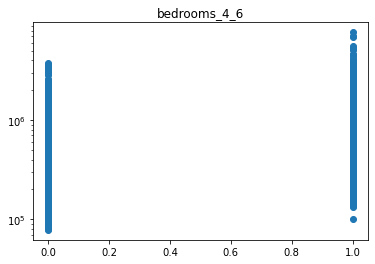

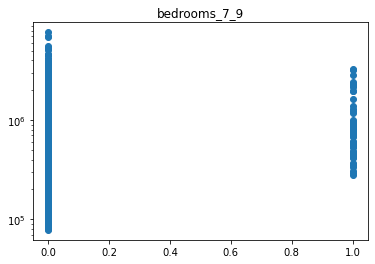

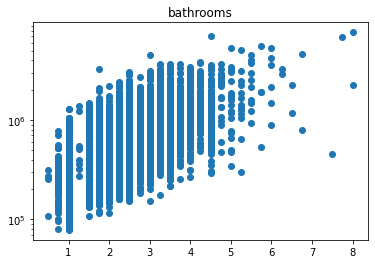

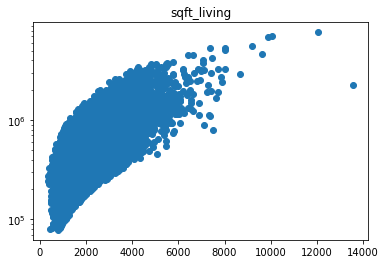

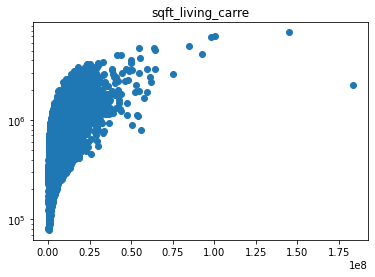

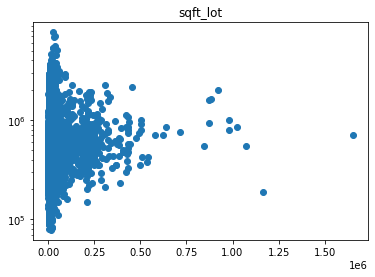

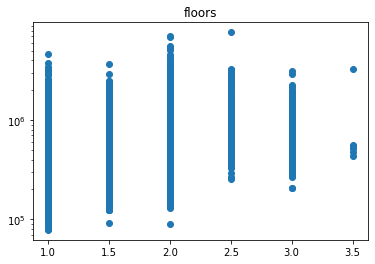

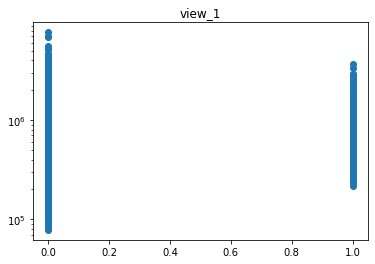

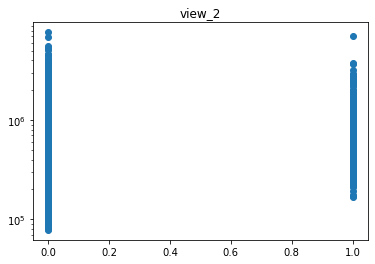

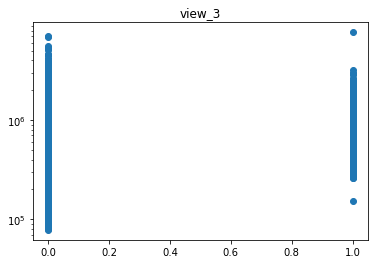

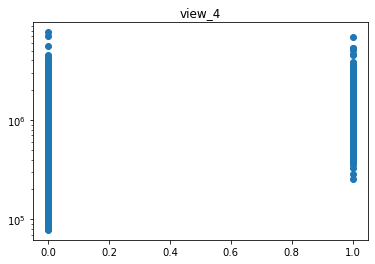

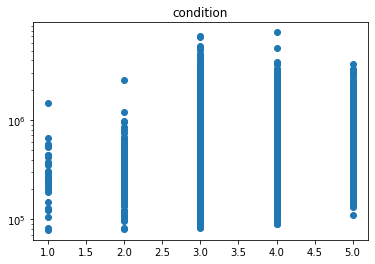

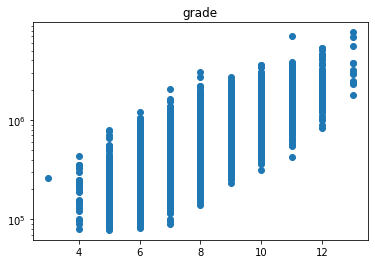

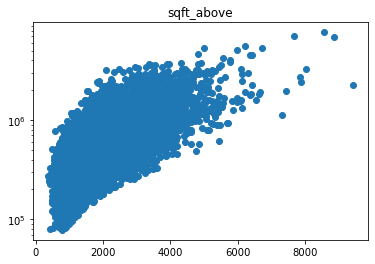

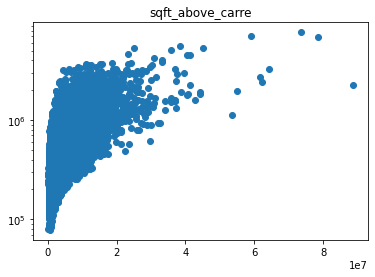

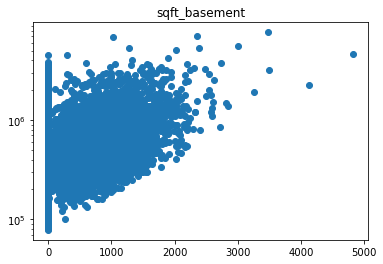

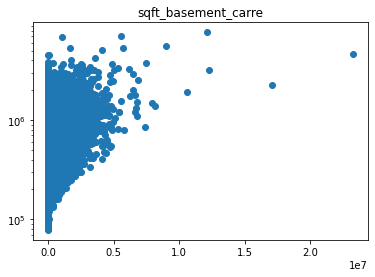

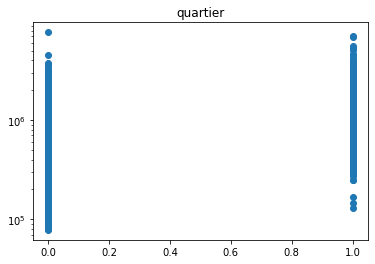

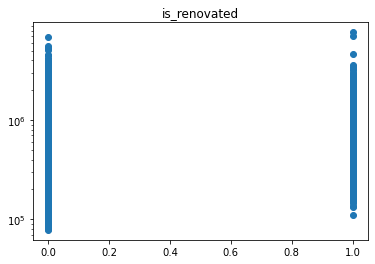

In [51]:
for column in df_dum_save.columns[0:-1] :
    plt.scatter(df_dum_save[column],df_dum_save["price"])
    plt.yscale('log')
    plt.title(column)
    plt.show()

# Export en csv

In [52]:
df_dum_save.to_csv('csv/df_preparation.csv',index=False)